## Machine Learning Coursera

Exercise 1: Linear Regression

### Initialization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

So basically we need to import these libraries for the various purpose such as plotting the graph, calculation of Gradient Descent and similar things.Pandas and Numpy are the very *Rich* libraries they provide very high level Data manipulation optimally.They are very convenient to use as building your code for such complex operations is surely not a good idea.

## ================== *Plotting* ===================

In [2]:
import os
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

This method <span style="color:RED"> pandas.DataFrame.head(n=5) </span> prints first 5 set of rows by default

In [3]:
data.head(n=5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


This method <span style="color:RED"> pandas.DataFrame.describe(percentiles=None, include=None, exclude=None)</span>
generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Now let's plot this given data, it will give the brief idea about how it look like.

Plotting Data ...



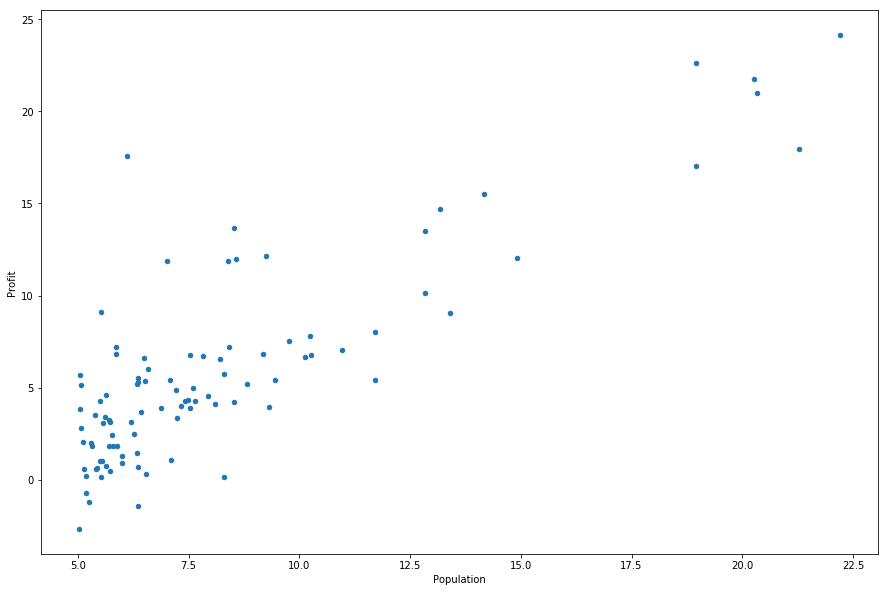

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(15,10))
print('Plotting Data ...\n')

## =================== *Compute Cost* ==================

Adding Ones column to the data matrix using <span style="color:RED"> pandas.DataFrame.insert(loc, column, value, allow_duplicates=False) </span> at specified location.Basically this is for the vectorization

In [6]:
data.insert(0, 'Ones', 1)

In [7]:
data.head(n=5)

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


This method <span style="color:RED"> numpy.ndarray.shape </span> used to “reshape” the array and <span style="color:RED"> pandas.DataFrame.iloc[] </span> for Purely "integer-location" based indexing for selection by position.

In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head()     #Shows first 5 set of data stored in X of object type

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()    #Shows first 5 set of data stored in y of object type

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


X and y are having the data type of object type, so they need to be converted into matrix.<br>Method <span style="color:RED"> numpy.matrix </span> Returns a matrix from an array-like object, or from a string of data.

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))   #currently theta is initialized as zero matrix

Now we need to compute the cost for the **theta**.So Defining the *computeCost*.

In [11]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Calling the computeCost method to calculate the cost.

In [12]:
computeCost(X, y, theta)

32.072733877455676

This is the initial cost which is obviously very high.So from here we have to define a function to perform *gradientDescent* to minimize the cost.

## ================= *Gradient Descent* ================

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Now we have to set the learning rate alpha and the no of iterations.

In [14]:
alpha = 0.01
iters = 1500

After setting the values, now we have to call the *gradientDescent* method to fit our parameters in the training set and plot the cost function over no of iterations.

In [15]:
theta_new, cost = gradientDescent(X, y, theta, alpha, iters)
print(theta_new)

[[-3.63029144  1.16636235]]


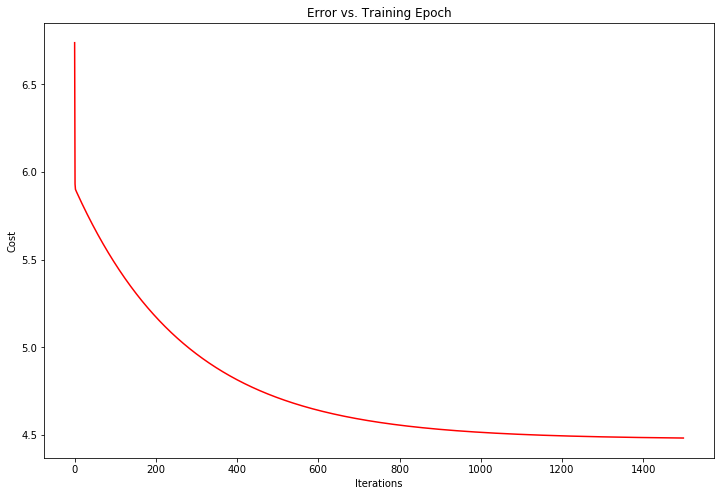

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Now we have to compute the cost of the trained model with updated theta, i.e, theta_new

In [17]:
computeCost(X, y, theta_new)

4.4833882565877259

Plotting the linear regression line to see how well it fits.<br><br>This Method <span style="color:RED">numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)</span> Return evenly spaced numbers over a specified interval.<br><br>This Method<span style="color:RED"> plt.subplots() </span>returns a tuple containing a figure and axes object. Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('filename.png').

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_new[0, 0] + (theta_new[0, 1] * x)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

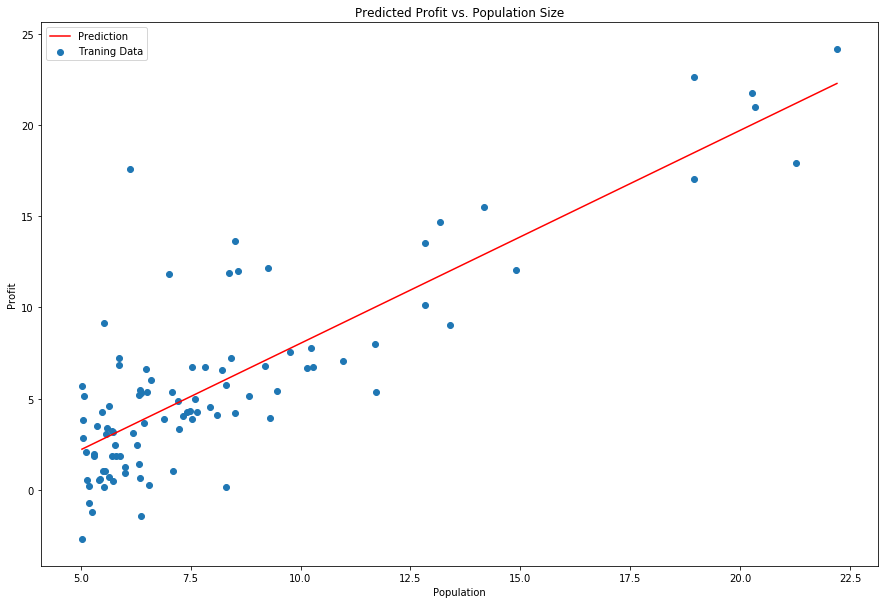

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta_new[0, 0] + (theta_new[0, 1] * x)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

So this is what our Regression Line looks like. Now our job is to make prediction for the given population.

In [19]:
flag = True
while flag :
    a=input("Program paused. Enter the population:")
    b=float(a)/10000;
    if b>0 :
        flag = False
        # Predict values for the given population
        predict1 = theta_new.dot([1, b]) # takes inner product to get y_bar
        print('For population = {} , we predict a profit of '.format(b*10000), predict1*10000)
    else :
        print("Population can't be -ve!! Please Try again")

Program paused. Enter the population:100000
For population = 100000.0 , we predict a profit of  [[ 80333.32063951]]
